In [1]:
import random
import math
import matplotlib.pyplot as plt

# Experiments
import sys
sys.path.append('../..')

from model.amm.stableswap_amm import StableSwapPoolState
from model.amm.basilisk_amm import ConstantProductPoolState
from model.amm.agents import Agent
from model.amm.global_state import GlobalState, fluctuate_prices
from model.amm.trade_strategies import random_swaps, invest_all

from model import run, plot_utils, processing

# same seed, same parameters = same simulation result
random.seed(42)

stable_pool = StableSwapPoolState(
    tokens={
        'R1': 500000,
        'R2': 500000
    },
    amplification=10,
    trade_fee=0.01
)

initial_state = GlobalState(
    pools = {
        'R1/R2': stable_pool
    },
    agents = {
        'Trader': Agent(
            holdings={'R1': 1000000, 'R2': 1000000},
            trade_strategy=random_swaps(pool_id='R1/R2', amount={'R1': 1000, 'R2': 1000}, randomize_amount=True)
        ),
        'LP': Agent(
            holdings={'R1': 1000000, 'R2': 1000000},
            trade_strategy=invest_all(pool_id='R1/R2')
        )
    },
    external_market={
        'R1': 1,
        'R2': 1
    },
    # evolve_function = fluctuate_prices(volatility={'R1': 1, 'R2': 1}, trend = {'R1': 1, 'R1': 1})
)

print(initial_state.pools)
events = run.run(initial_state, time_steps=10000)

events = processing.postprocessing(events, optional_params=['holdings_val', 'token_count', 'pool_val', 'withdraw_val'])

{'R1/R2': Stable Swap Pool
base trade fee: 0.01
shares: 1000002.0000002857145850338464528290990450804169011
tokens: (
    R1
    quantity: 500000.0
    weight: 0.5
)
(
    R2
    quantity: 500000.0
    weight: 0.5

)error message:none}
Starting simulation...
Execution time: 10.041 seconds.


In [2]:
%matplotlib inline

Text(0, 0.5, 'liquidity in asset Y')

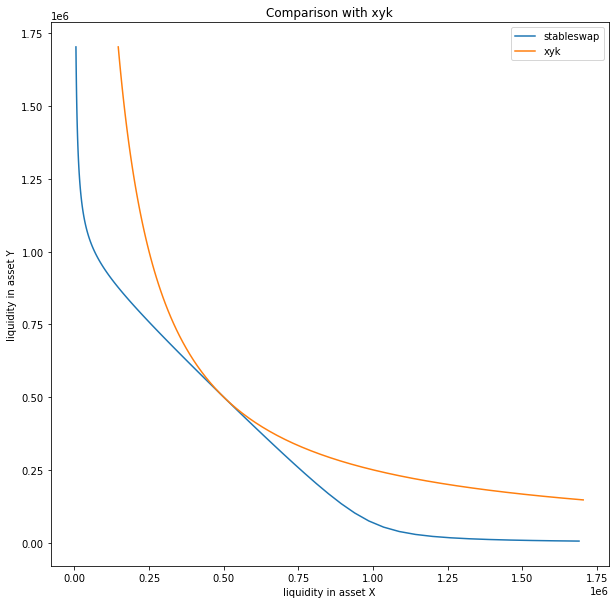

In [3]:
d = stable_pool.calculate_d()
n_points = 100
f = 1.05
x_values = [f ** i - 1 for i in range(n_points)]

minX = 5000
maxX = f ** (n_points - 1)
maxY = stable_pool.calculate_y(minX, d)

r = [minX + x_values[i] / maxX * maxY - minX * (i / (n_points-1)) ** 10 for i in range(n_points)]
# print(r)
plt.figure(figsize=(10, 10))
plt.plot(r, [stable_pool.calculate_y(r[i], d) for i in range(len(r))], label='stableswap')
# print(maxY)

# comparison with xyk pool
k = stable_pool.liquidity['R1'] * stable_pool.liquidity['R2']
minX = k / maxY
r = [minX + x_values[i] / maxX * maxY - minX * (i / n_points) ** 10 for i in range(n_points)]
# print(r)
# print(k / r[0])
plt.plot(r, [k / r[i] for i in range(len(r))], label='xyk')
plt.title('Comparison with xyk')
plt.legend()
plt.xlabel('liquidity in asset X')
plt.ylabel('liquidity in asset Y')

['R1', 'R2']


<AxesSubplot:title={'center':'pool: R1/R2 liquidity R2 '}>

<Figure size 720x720 with 0 Axes>

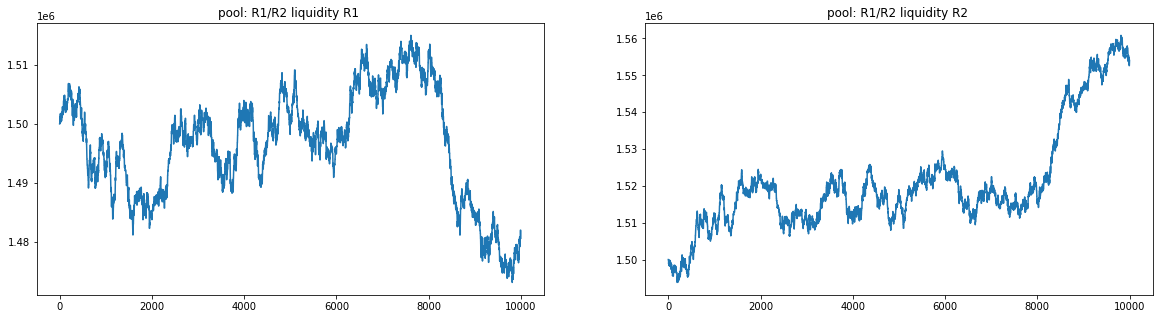

In [4]:
r = [minX + x_values[i] / maxX * maxY - minX * (i / (n_points-1)) ** 10 for i in range(n_points)]
# print(r)
print(stable_pool.asset_list)
plt.figure(figsize=(10, 10))
# invariant = stable_pool.liquidity['R1'] * stable_pool.liquidity['R2']
# def get_spot_price(x_balance):
#     stable_pool.liquidity['R1'] = x_balance
#     stable_pool.liquidity['R2'] = invariant / x_balance
#     return stable_pool.spot_price()
# plt.plot(r, [get_spot_price(r[i]) for i in range(len(r))], label='stableswap')

plot_utils.plot(events, pool='R1/R2', prop='liquidity')

<AxesSubplot:title={'center':'agent: Trader holdings_val  '}>

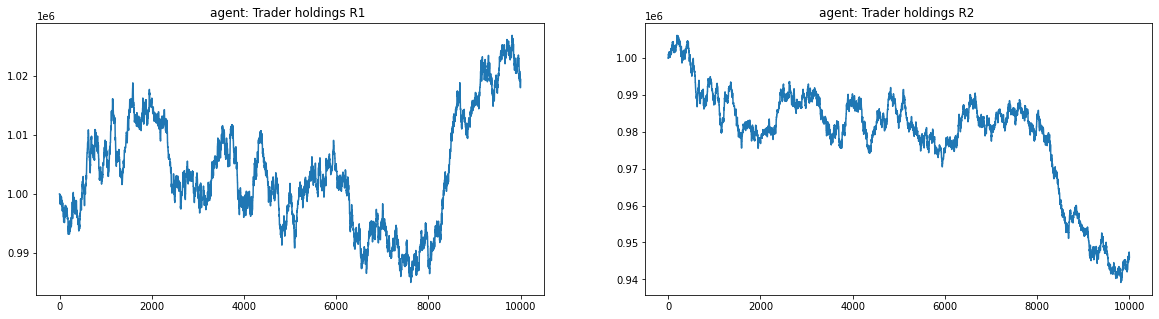

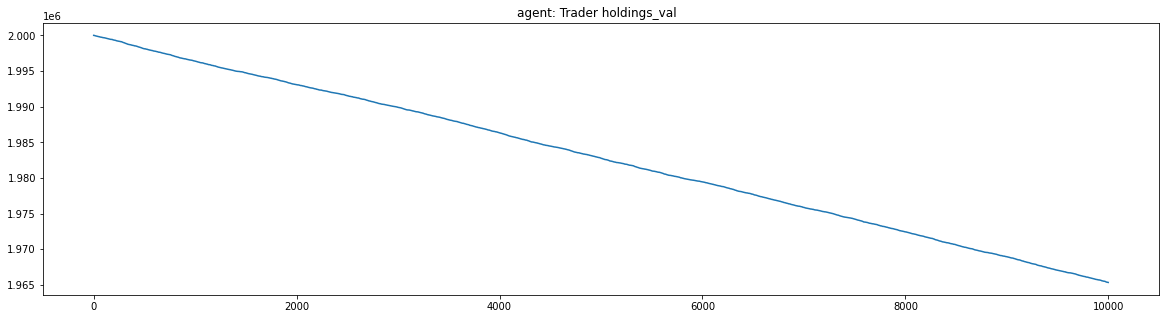

In [8]:
plot_utils.plot(events, agent='Trader', prop='holdings', key=['R1', 'R2'])
plot_utils.plot(events, agent='Trader', prop='holdings_val')
# plot_utils.plot(events, agent='Trader', prop='token_count')
# ax = plot_utils.plot(events, agent='Trader', prop='holdings', key='R1')
# plot_utils.plot(events, agent='Trader', prop='holdings', key='R2', subplot=ax)
# plot_utils.plot(events, pool='R1/R2', prop='pool_val', subplot=ax)
# plt.figure(figsize=(20, 5))
# r1_val = plot_utils.get_datastream(events, agent='Trader', prop='holdings', key='R1')
# r2_val = plot_utils.get_datastream(events, agent='Trader', prop='holdings', key='R2')
# print(len(r1_val))
# plt.plot(range(len(events)), [r1_val[i] + r2_val[i] for i in range(len(events))])

<AxesSubplot:title={'center':'agent: LP withdraw_val  '}>

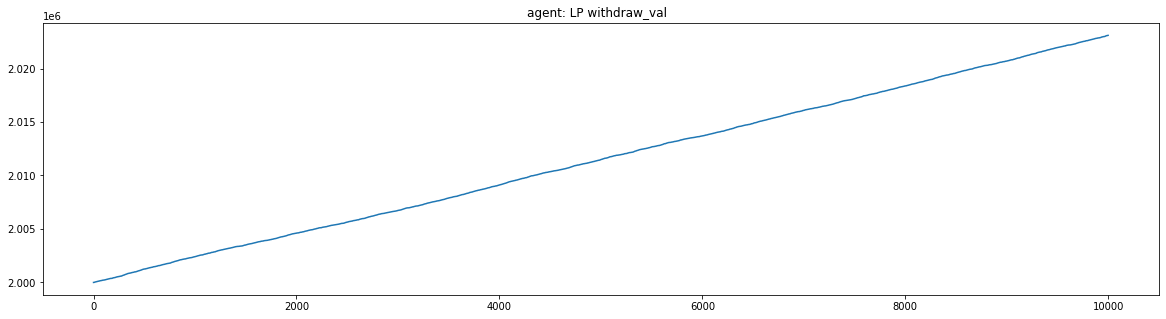

In [7]:
plot_utils.plot(events, agent='LP', prop='withdraw_val')